In [190]:
import pandas as pd
import numpy as np 
import pickle
from basic_analysis_toolkit import BasicAnalysis
from company_toolkit import *
import datetime
from sklearn.cluster import KMeans
from sklearn import linear_model
import openpyxl


In [191]:
sp500_dataframe = pickle.load(open('sp500_dataframe', 'rb'))        
company_dict = pickle.load(open('company_dictionary.pickle', 'rb'))
analysis = BasicAnalysis(sp500_dataframe)
start = datetime.date(day=1, month=9, year=2018)
end = datetime.date(day=1, month=9, year=2019)
frm_data = pickle.load(open('fundemental_risk_model_normdata.pickle', 'rb'))
tickers = list(frm_data.index)
risk_free_rates = pd.read_csv('treasury_3month_interest_rate.csv', parse_dates = ['DATE'], index_col = 'DATE').reindex(pd.date_range(start, end, freq='B'))
risk_free_rates =risk_free_rates.fillna(method='pad')

In [192]:
# creating a column that has the industry information for each ticker 
industries = []
for ticker in tickers:
    company = company_dict.get(ticker)
    industry = company.info.get('Industry')
    industries.append(industry)
ind_series = pd.Series(industries, index=tickers)
frm_data['Industries'] = ind_series
frm_data.to_excel("10_factor_rm_sp500_coefs.xlsx")

In [193]:
tickers = list(frm_data.index)
return_data = pd.DataFrame()
for ticker in tickers:
    data = analysis.get_percent_change(ticker, start, end, 'BM')
    return_data[ticker] = data
return_data = return_data.transpose()
    


In [194]:
X = frm_data.drop(columns = ['Industries', 'Momentum'])
costs = [[], [], [], [], [], [], [], [], [], [], []]
for date in return_data.columns:
    rf = risk_free_rates['TB3MS'].get(date)
    if str(rf) == 'nan' or str(rf) == 'None':
        rf = .03 # manually entering this, given in the actual data set mapped to 8/01/2014
    rf = (1+rf) ** (1/12) - 1
    Y = return_data[date]- rf
    regr = linear_model.LinearRegression(fit_intercept=False)
    regr.fit(X, Y)
    for i in range(len(regr.coef_)):
        costs[i].append(regr.coef_[i])
    

In [196]:
list_series = []
for list_costs in costs:
    if len(list_costs) != 0:
        s = pd.Series(list_costs, index=return_data.columns)
        list_series.append(s)
frm_data

,Size (num of employees),Price to Book,Earnings Yield,Dividend Yield,Momentum,Growth (gross profit increase),Earning Variability,Financial Leverage,Volatility,Trading Volume,Industries
MMM,0.018842,0.012940,-0.002029,0.139875,-0.095648,-0.012222,-0.010549,0.002548,0.045441,-0.011271,Diversified Industrials
ABT,0.023387,0.015386,-0.002346,-0.064693,0.029631,0.016550,0.004781,0.000305,-0.034354,0.009159,Medical Devices
ABBV,-0.009797,-0.022207,-0.002131,0.420908,-0.053604,0.004403,-0.010158,0.016171,-0.019684,0.018091,Drug Manufacturers - Major
ABMD,-0.022811,-0.076226,-0.002245,-0.213650,-0.371132,-0.017673,-0.011539,-0.003120,0.325060,-0.021607,Medical Devices
ACN,0.195674,0.129008,-0.002179,-0.067672,0.045627,-0.000135,-0.008642,0.000726,0.028568,-0.013480,Information Technology Services
...,...,...,...,...,...,...,...,...,...,...,...
XYL,-0.015707,0.001098,-0.002134,-0.091505,-0.008205,0.010581,-0.004514,0.001064,-0.037633,-0.018993,Diversified Industrials
YUM,-0.007979,0.147122,-0.002182,-0.072637,0.050973,-0.015343,-0.009110,-0.001690,-0.012056,-0.012440,Restaurants
ZBH,-0.014797,-0.038900,-0.002536,-0.143144,0.020312,0.000054,0.030080,0.000734,-0.013437,-0.018263,Medical Devices
ZION,-0.018740,-0.072400,-0.001524,0.115049,-0.025075,0.006769,-0.001142,0.023692,-0.053111,-0.011874,Banks - Regional - US


In [197]:
c

In [198]:
market_costs_indices.to_excel("10_factor_rm.xlsx")

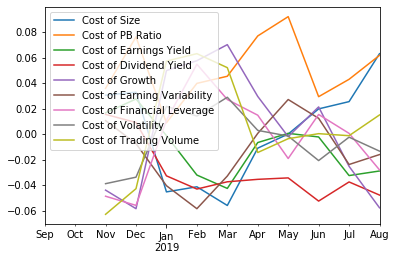

In [199]:
market_costs_indices.rolling(window=3).mean().plot()

In [200]:
APT_costs = pickle.load(open('cost_sensitivity_monthly_dataframe.pickle', 'rb'))
APT_coef_dataframe = pickle.load(open('APT_coef_dataframe.pickle', 'rb'))
APT_coef_dataframe.to_excel('7_factor_rm_coefs.xlsx')
APT_costs.to_excel("7_factor_rm_costs.xlsx")

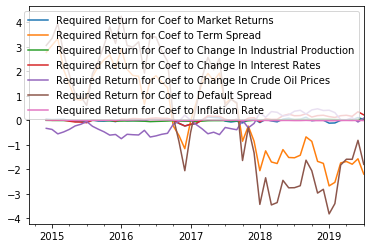

In [201]:
APT_costs.rolling(window=4).mean().plot()